# Computational approaches to assist drug repositioning for COVID-19
### Matrix decomposition model -- approach 1

In [1]:
import numpy.matlib
from numpy import linalg as LA
import pandas as pd 
import numpy as np
import algorithm as MF
import matplotlib.pyplot as plt 
from collections import defaultdict 

Load datasets

In [2]:
drugvirM = pd.read_csv('data/drugvirMatrix.csv', header=None)
drugNames = pd.read_csv('data/drugNames.csv', header=None)
virusNames = pd.read_csv('data/virusNames.csv', header=None)

The matrix $X$ contains the drug-virus associations. For convenience, the developmental stages are codified in the matrix using integers from 1 to 8, as follows:

$X_{ij} = 1$ indicates cell/culture co-culture experiments\
$X_{ij} = 2$ indicates primary cells/organoids experiments\
$X_{ij} = 3$ indicates animal model experiments\
$X_{ij} = 4$ indicates phase I clinical trials \
$X_{ij} = 5$ indicates phase II clinical trials \
$X_{ij} = 6$ indicates phase III clinical trials \
$X_{ij} = 7$ indicates phase VI clinical trials \
$X_{ij} = 8$ indicates approved associations

In [3]:
X = drugvirM.values 

Define the masks for the subset of entries in X according to their developmental stages 

In [4]:
masks = defaultdict()

for i in range(9):
    masks[i] = X == i


Optimal parameters for every subset of entry

In [5]:
alphas = [1.0, 0.01, 0.01, 0.01, 0.16, 0.27, 0.73, 1.0, 1.0];
k = 5 # number of latent factors
Xbinary = X > 0
Xbinary.astype(int)

array([[0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
[W, H, J] = MF.DecompositionAlgorithm(Xbinary, k, alphas, masks)

Iter 118 delta 9.746571477445836e-05


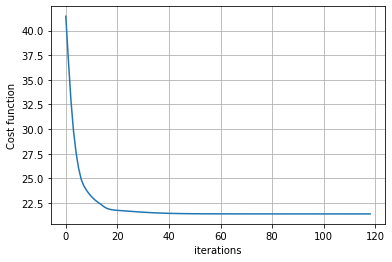

In [7]:
plt.plot(J)
plt.ylabel('Cost function')
plt.xlabel('iterations')
plt.grid(True)
plt.show()

Predicted scores for every drug-virus association in the matrix

In [8]:
predictedScores = pd.DataFrame(data=np.dot(W, H),    # values
...              index=drugNames.values.flatten().tolist(),    # 1st column as index
...              columns=virusNames.values.flatten().tolist())

Predicted Broad-Spectrum Antivirals for SARS-CoV-2

In [11]:
df = predictedScores.sort_values(by=['SARS-CoV-2'],  ascending=False)

In [12]:
df.loc[:, 'SARS-CoV-2']

Favipiravir              9.629694e-01
Arbidol (Umifenovir)     9.414001e-01
Lopinavir                6.119323e-01
Ritonavir                5.861103e-01
Lamivudine               4.752093e-01
                            ...      
N-MCT                   1.092129e-162
Fluoxetine              3.387944e-164
Sofosbuvir              2.594121e-172
Pirlindole              3.018887e-186
Dibucaine               4.536245e-187
Name: SARS-CoV-2, Length: 126, dtype: float64